In [ ]:
import numpy as np
import pandas as pd
import flexynesis 
import os, re
import seaborn as sns

/Users/hc/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Seed set to 42


In [2]:
# import all stats from the output folder 
# Define paths
output_dir = "/Users/hc/Documents/uber/output"
log_file = os.path.join(output_dir, "experiment_log.tsv")

# Load experiment log
experiment_log = pd.read_csv(log_file, sep="\t")

# List all stats.csv files in output directory
stats_files = [f for f in os.listdir(output_dir) if f.startswith("experiment") and f.endswith("stats.csv")]

# Read and combine all stats files
stats_data = []
for stats_file in stats_files:
    experiment_id = re.sub(".stats.csv", "", stats_file)
    file_path = os.path.join(output_dir, stats_file)
    df = pd.read_csv(file_path)
    df["experiment_id"] = experiment_id  # Add experiment_id column
    stats_data.append(df)

combined_stats = pd.concat(stats_data, ignore_index=True)

# Merge with experiment log
stats = experiment_log.merge(combined_stats, on="experiment_id", how="left")

In [3]:
# print rankings of experiments based on pearson correlation 
rankings = stats[stats['metric'] == 'pearson_corr'].sort_values('value', ascending=False)

In [4]:
rankings

,experiment_id,model,data_types,fusion,gnn_conv,method,var,variable_type,metric,value
8,experiment3,GNN,mutation,early,SAGE,GNN,Erlotinib,numerical,pearson_corr,0.095991
2,experiment1,supervised_vae,mutation,early,NaN,supervised_vae,Erlotinib,numerical,pearson_corr,0.094216
5,experiment2,GNN,mutation,early,GC,GNN,Erlotinib,numerical,pearson_corr,0.074535


In [6]:
# import embeddings for the experiment with the best performance
prefix = list(rankings['experiment_id'])[0]
train_embeddings = pd.read_csv(os.path.join(output_dir, '.'.join([prefix, "embeddings_train.csv"])), index_col=0)
test_embeddings = pd.read_csv(os.path.join(output_dir, '.'.join([prefix, "embeddings_test.csv"])), index_col=0)

In [7]:
train_embeddings.head()

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E70,E71,E72,E73,E74,E75,E76,E77,E78,E79
GaMG,0.175338,0.121278,-0.060287,-0.038612,0.145797,-0.185727,0.133043,0.167136,-0.280158,-0.087048,...,-0.076484,-0.162247,0.161397,0.010787,0.082432,-0.089504,0.095545,0.023973,-0.122414,-0.253139
TE-5,0.074499,0.204308,-0.168244,-0.041715,0.249921,-0.398685,0.124383,0.178408,-0.372769,-0.133898,...,-0.072965,-0.067239,0.076306,0.322501,0.089867,-0.197401,0.060179,0.276745,-0.049660,-0.416713
Rh30,0.111966,0.184886,0.033293,0.026554,0.185385,-0.214994,0.176025,0.150771,-0.400126,-0.128303,...,-0.092466,-0.023430,0.077506,0.060926,0.084329,-0.018287,-0.014449,0.045941,-0.051889,-0.309268
Caov-3,0.111966,0.184886,0.033293,0.026554,0.185385,-0.214994,0.176025,0.150771,-0.400126,-0.128303,...,-0.092466,-0.023430,0.077506,0.060926,0.084329,-0.018287,-0.014449,0.045941,-0.051889,-0.309268
SNU-1105,0.111966,0.184886,0.033293,0.026554,0.185385,-0.214994,0.176025,0.150771,-0.400126,-0.128303,...,-0.092466,-0.023430,0.077506,0.060926,0.084329,-0.018287,-0.014449,0.045941,-0.051889,-0.309268


In [8]:
test_embeddings.head()

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E70,E71,E72,E73,E74,E75,E76,E77,E78,E79
GaMG,0.137598,0.231845,0.122901,0.140107,0.472630,-0.213118,0.367485,0.278716,-0.441958,-0.233882,...,0.043894,-0.157574,0.316506,0.086055,-0.009805,-0.182942,-0.062082,-0.240189,-0.278313,-0.516761
TE-5,0.043386,0.128382,0.107073,-0.004713,0.589146,-0.221029,0.375283,0.239337,-0.425591,-0.227707,...,0.031630,-0.104424,0.445304,0.167634,-0.039098,-0.268549,-0.086608,-0.175402,-0.203565,-0.568405
Caov-3,0.172868,0.183266,-0.034132,0.021529,0.053839,-0.153141,0.159336,0.204200,-0.483462,-0.080638,...,-0.212850,0.016452,0.016982,0.117780,0.083384,0.167017,-0.129266,-0.187753,0.020128,-0.268495
MSTO-211H,-0.267984,-0.030752,0.227132,-0.068912,-0.182874,0.007795,0.391816,0.353559,-0.366305,-0.030807,...,-0.056681,0.185267,-0.009649,0.005142,-0.040419,-0.109794,0.015655,0.381510,0.208279,0.061398
B-CPAP,0.279939,0.196050,0.162172,0.329527,0.108357,-0.316178,0.261203,0.109375,-0.500325,-0.361597,...,0.051364,0.266139,-0.221914,-0.018464,0.188586,-0.389524,-0.005166,-0.477674,0.121948,-0.349514


In [11]:
# get drug response scores and make PCA plots 
clin_train = pd.read_csv('/Users/hc/Documents/uber/flexynesis-mps-test-datasets/ccle_vs_gdsc/train/clin.csv')
clin_test = pd.read_csv('/Users/hc/Documents/uber/flexynesis-mps-test-datasets/ccle_vs_gdsc/test/clin.csv')

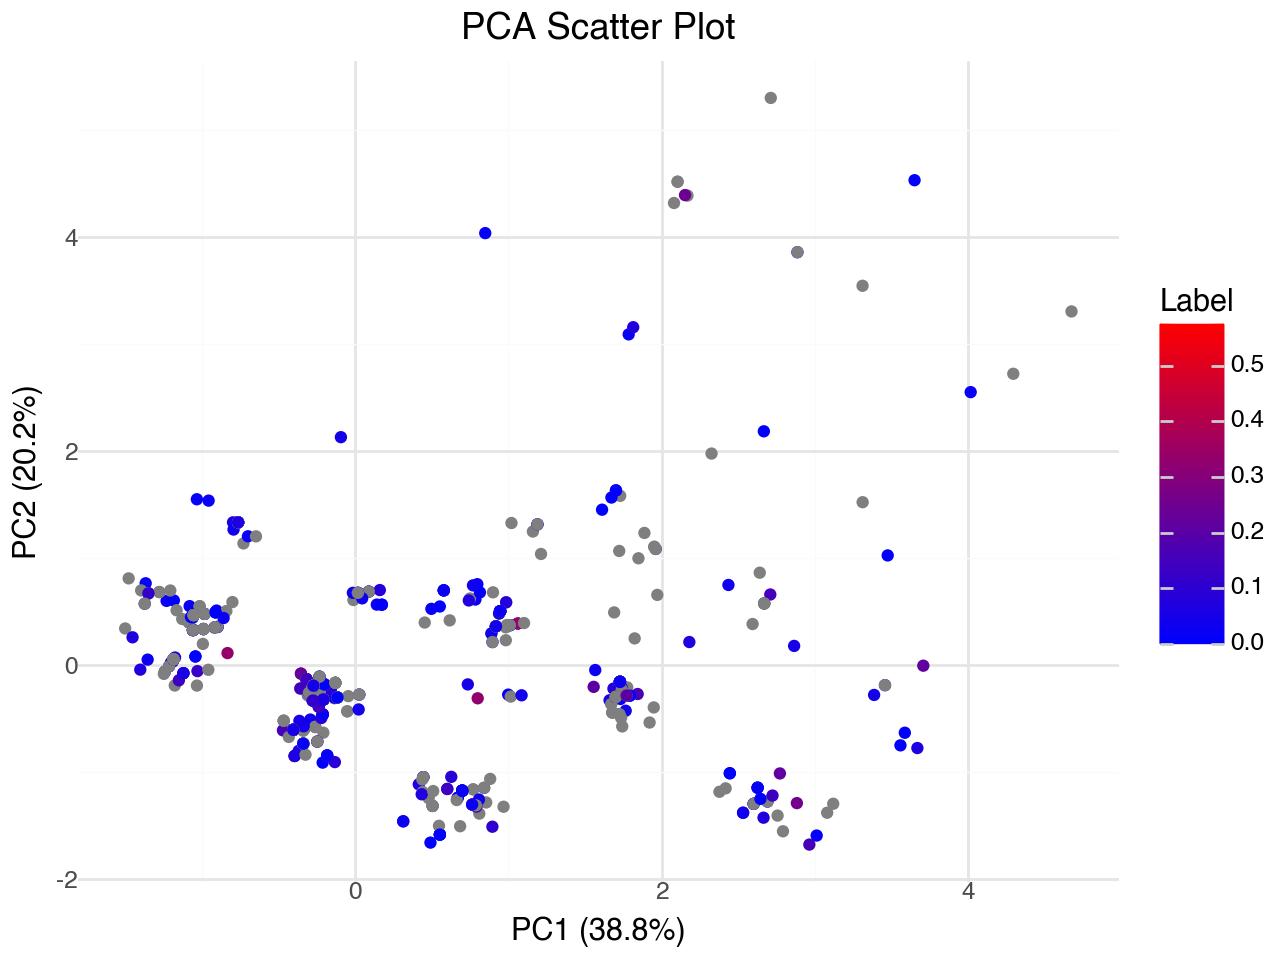

In [12]:
flexynesis.plot_dim_reduced(train_embeddings, clin_train.loc[train_embeddings.index]['Erlotinib'], color_type='numerical')

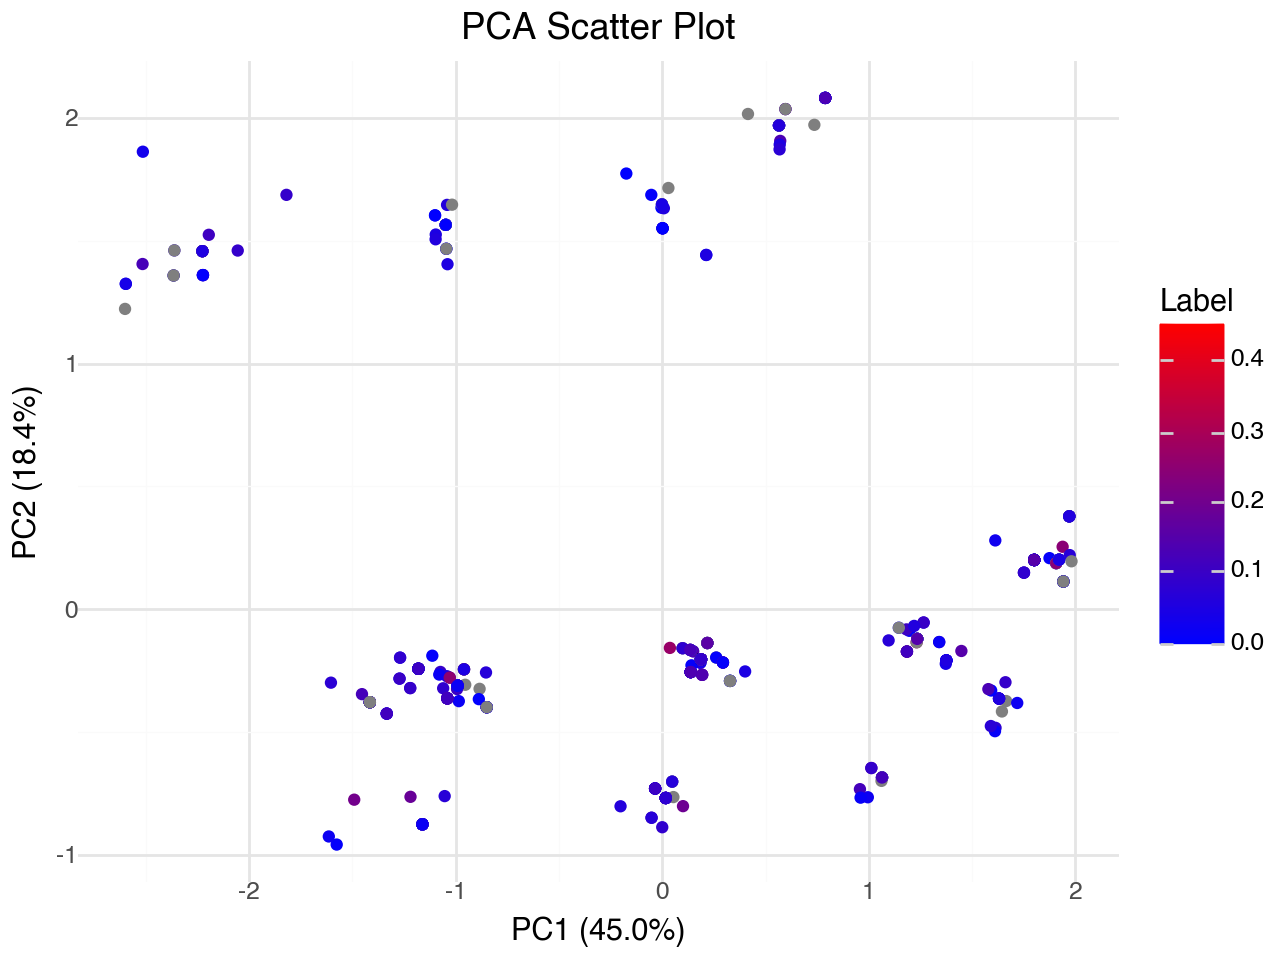

In [13]:
flexynesis.plot_dim_reduced(test_embeddings, clin_test.loc[test_embeddings.index]['Erlotinib'], color_type='numerical')

# Top markers

In [14]:
# import feature importance scores from the best performing experiment 
prefix = list(rankings['experiment_id'])[0]
marker_importance = pd.read_csv(os.path.join(output_dir, '.'.join([prefix, "feature_importance.IntegratedGradients.csv"])), index_col=0)

In [15]:
# sort by importance
marker_importance.sort_values('importance', ascending=False)[0:10]

,target_class,target_class_label,layer,name,importance,explainer
target_variable,,,,,,
Erlotinib,0,NaN,mutation,KRAS,0.009738,IntegratedGradients
Erlotinib,0,NaN,mutation,BRAF,0.007880,IntegratedGradients
Erlotinib,0,NaN,mutation,NF1,0.007450,IntegratedGradients
Erlotinib,0,NaN,mutation,NRAS,0.006957,IntegratedGradients
Erlotinib,0,NaN,mutation,PIK3CA,0.004073,IntegratedGradients
Erlotinib,0,NaN,mutation,PTEN,0.003940,IntegratedGradients
Erlotinib,0,NaN,mutation,TP53,0.003744,IntegratedGradients
Erlotinib,0,NaN,mutation,SMARCA4,0.001885,IntegratedGradients
Erlotinib,0,NaN,mutation,NOTCH1,0.001687,IntegratedGradients


In [16]:
list(marker_importance.sort_values('importance', ascending=False)[0:10]['name'])

['KRAS',
 'BRAF',
 'NF1',
 'NRAS',
 'PIK3CA',
 'PTEN',
 'TP53',
 'SMARCA4',
 'NOTCH1',
 'APC']

EGFR, KRAS, and PIK3CA are well known markers of Erlotinib resistance/response. See CiVIC (Clinical Interpretation of Variants in Cancer) database https://civicdb.org/therapies/15/summary for Erlotinib indications and molecular markers. 

# A note about the model performance upper bounds

The model performance that you can achieve in this exercise is bounded by the reproducibility of the cell line sensitivities to the drug treatments in both datasets. 
The drug response measurements for a given drug in CCLE and GDSC for the same set of cell lines are not perfectly correlated. While there is good level of reproducibility for most drugs, it is not perfect. In the case of Erlotinib response profiles, below you'll see a scatter plot of the actual response measurements for the cell lines that are commonly profiled for Erlotinib in both CCLE and GDSC datasets. Here, we find that the measured values have a good correlation but not close to perfect. So, the model performances observed in this exercise also including cell lines that are not common in both datasets, a Pearson's correlation of about 0.45 is not that bad. Moreover, being able to discover known markers of Erlotinib resistance/response is also a good indication for the model's reliability.  

In [17]:
# find cell lines common in both datasets (treated for Erlotinib)
common = np.intersect1d(clin_train[pd.notna(clin_train['Erlotinib'])].index, clin_test[pd.notna(clin_test['Erlotinib'])].index)

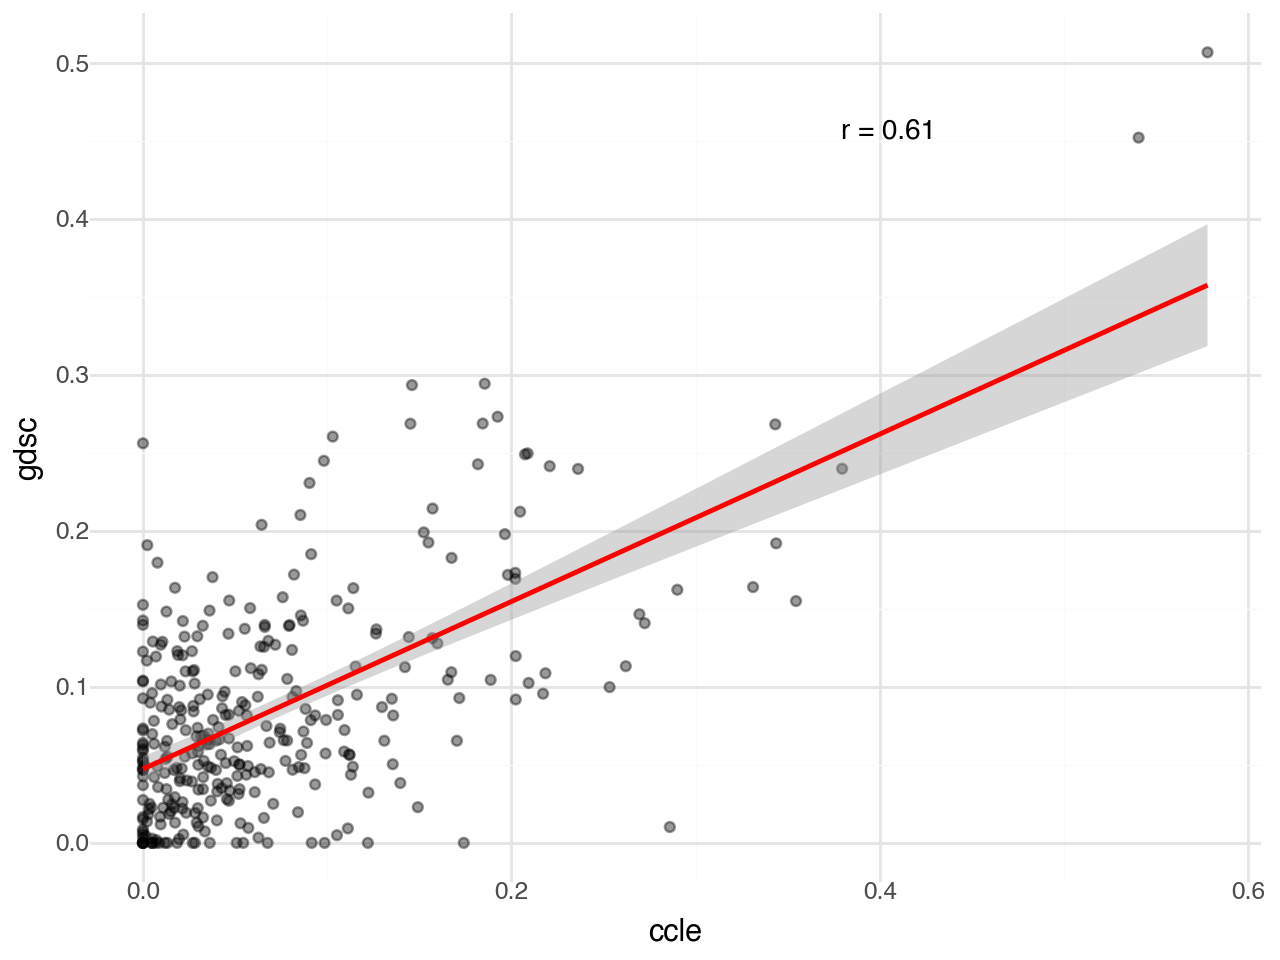

In [18]:
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_minimal, annotate
from scipy.stats import pearsonr
ccle = clin_train.loc[common]['Erlotinib']
gdsc = clin_test.loc[common]['Erlotinib']
# Calculate correlation coefficient
correlation, _ = pearsonr(ccle, gdsc)
# Create a DataFrame
data = pd.DataFrame({'ccle': ccle, 'gdsc': gdsc})
# Create scatter plot with regression line
plot = (
    ggplot(data, aes(x='ccle', y='gdsc')) +
    geom_point(color='black', alpha = 0.4) +
    geom_smooth(method='lm', color='red') +
    annotate("text", x=max(ccle)*0.7, y=max(gdsc)*0.9, label=f'r = {correlation:.2f}', size=10, color='black') +
    theme_minimal()
)
plot